# STAT 301 Group Project

# Linear Prediction Model for Stars of a Github Project

Vincent Luong

### Sections
- #### [Introduction](#intro)
    - ##### [Data](#data)
    - ##### [Question](#question)
- #### [Exploratory Data Analysis and Visualization](#a2)
    - ##### [Reading Data From Web](#web)
    - ##### [Tidy Data](#tidy)
    - ##### [Visualizations](#visual)
- #### [Exploratory Data Analysis and Visualization](#a3)
    - ##### [Assumptions and Limitations](#limit)
- #### [Implementation of a Proposed Model](#model)
    - ##### [Results of Reduced Model](#result)
    - ##### [Conclusion](#conc)

# Introduction <a id = 'intro'>
    
The Stars on a Github Project represents the number of users who have marked the respository as a favourite.  Those who have many stars on a respective GitHub project, their project is seen as prestigious and ideal when compared to other projects; thus most people tend to try to maximize the number of Stars they get on a GitHUb Project.  In our case study, we are exploring some of the variables that can have a statistically significant effect on the Star Rating of a GitHub Project to see if we can accurately predict the amount of Stars a given project will get.  Although countless variables can affect the number of Stars a GitHub project can get, for simplicity, we will only be using the 3 most popular software develop languages: `Java`, `HTML`, and `Python`. to make generalisations of the whole population of GitHub Projects.  The variables included in the dataset are listed below with a short description detailing the information they provide. 

## Data <a id = 'data'>
The dataset we have been assigned to work with is "The Most Popular GitHub Repositories (Projects)".  This dataset contains a list of the Top 215k GitHub projects with over *167 stars*.  There are a total of 215k observations with 24 variables to choose from. Further explanations of the data's variables includes:

Categorical Variables:
- `Name`: The name of the GitHub repository
- `Description`: A brief textual description that summarizes the purpose or focus of the repository
- `URL`: The URL or web address that links to the GitHub repository, which is a unique identifier for the repository
- `Created At`: The date and time when the repository was initially created on GitHub, in ISO 8601 format
- `Updated At`: The date and time of the most recent update or modification to the repository, in ISO 8601 format
- `Homepage`: The URL to the homepage or landing page associated with the repository, providing additional information or resources
- `Language`: The primary programming language
- `Topics`:A list of topics or tags associated with the repository, helping users discover related projects and topics of interest
- `License`: Information about the software license using a license identifier
- `Has Issues`: A boolean value indicating whether the repository has an issue tracker enabled. In this case, it's true, meaning it has an issue tracker
- `Has Projects`: A boolean value indicating whether the repository uses GitHub Projects to manage and organize tasks and work items
- `Has Downloads`: A boolean value indicating whether the repository offers downloadable files or assets to users
- `Has Wiki`: A boolean value indicating whether the repository has an associated wiki with additional documentation and information
- `Has Pages`: 	A boolean value indicating whether the repository has GitHub Pages enabled, allowing the creation of a website associated with the repository
- `Has Discussions`: A boolean value indicating whether the repository has GitHub Discussions enabled, allowing community discussions and collaboration
- `Is Fork`: A boolean value indicating whether the repository is a fork of another repository. In this case, it's false, meaning it is not a fork
- `Is Archived`: A boolean value indicating whether the repository is archived. Archived repositories are typically read-only and are no longer actively maintained
- `Is Template`: A boolean value indicating whether the repository is set up as a template
- `Default Branch`: The name of the default branch

Numerical Variables:
- `Size`: The size of the repository in bytes, indicating the total storage space used by the repository's files and data
- `Stars`: The number of stars or likes that the repository has received from other GitHub users, indicating its popularity or interest
- `Issues`: The total number of open issues
- `Forks`: The number of times the repository has been forked by other GitHub users
- `Watchers`: The number of GitHub users who are "watching" or monitoring the repository for updates and changes

*Data Collection:*

The data was collected by using a search API (application programming interface); then the creator kept gathering GitHub projects and their attributes until they recieved all projects that had star ratings $\geq$ 167. 

## Research Question <a id = 'question'>
**Updated (Included more Input variables in our MLR Question)**

Given the number of Forks, Issues, and Size alongside their status of Language, Downloadable files, and associated Wikis, Can We Make a Model Which can Accurately Predict the Number of Stars a Github Project will Have?

Relevant variables in this question:
- `Stars`: The number of stars or likes that the repository has received from other GitHub users, indicating its popularity or interest
- `Issues`: The total number of open issues
- `Forks`: The number of times the repository has been forked by other GitHub users
- `Size`: The size of the repository in bytes, indicating the total storage space used by the repository's files and data
- `Language`: The primary programming language
- `Has Downloads`: A boolean value indicating whether the repository offers downloadable files or assets to users
- `Has Wiki`: A boolean value indicating whether the repository has an associated wiki with additional documentation and information
- `Is Archived`: A boolean value indicating whether the repository is archived. Archived repositories are typically read-only and are no longer actively maintained

We will be using `Stars` as the response variable; for the explanatory variable, we will be `Forks`, `Size`, `Language`, `Issues`, `Has Wiki` and `Has Downloads` as the input variables.

## Usage of Chosen Input Variables

Additionally, we will only be exploring GitHub projects that are using the following programming Languages: *Java*, *Python*, and *HTML*.  These projects are to be considered the *most popular coding languages*; therefore 

that way, our domain can be contained and we can create a predction model for a specific set of samples.

From the original sample size: $n_{orginal} = 215029$, we are to plan to filter out some of our input variables and are to take a random sample of $n = 1200$ (without replacement) to make generalizations of whole population of GitHub Repositories.

Lowering and filtering our original sample allows us to have the benefits of:
- Puting less strain on Jupyter Notebook
- Being more specific in our model prediction training/testing
- Having to worry less abount possible confounding variables appearing in our dataset.

Using a multiple linear regression model, we can explore/predict the relationship between the star value and our chosen input variables of a GitHub project.  From the respective values given to us from using the model, we can then conduct hypothesis testing on our MLR model and discover whether there is a statiscally significant difference between the star rating of a project and our chosen input variables of a GitHub project.

## Prediction Model

This question is mainly focused on prediction as we are trying to create a model with our chosen input variables to discover which can accurately predict star ratings.

# Exploratory Data Analysis and Visualization <a id = 'a2'>

## Reading Data From the Web <a id = 'web'>

In [1]:
library(readr) #Reading Data From Web
library(tidyverse) #Assists in creating visually appealing graphs
library(dplyr) #Data manipulation 
library(GGally) #Creating Pairwise plot
library(broom) #Tidy data
library(gridExtra) #Helps Arrange the Grids in specific order
library(repr) #Assists in setting up graph sizing
library(AER) #Variance Inflation Factor
library(mltools) #For Prediction Model
library(leaps) #Forward Selection Algorithm
library(glmnet) #Lasso Selection Model

options(repr.plot.width = 13, repr.plot.height = 10)
git_data <- read_csv("https://raw.githubusercontent.com/Vondent/GitHub_Prediction/main/github.csv")
head(git_data)
set.seed(123)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’

Name                       
1 freeCodeCamp               
2 free-programming-books     
3 awesome                    
4 996.ICU                    
5 coding-interview-university
6 public-apis                
  Description                                                                             
1 freeCodeCamp.org's open-source codebase and curriculum. Learn to code for free.         
2 :books: Freely available programming books                                              
3 😎 Awesome lists about all kinds of interesting topics                                  
4 Repo for counting stars and contributing. Press F to pay respect to glorious developers.
5 A complete computer science study plan to become a software engineer.                   
6 A collective list of free APIs                                                          
  URL                                                       Created At         
1 https://github.com/freeCodeCamp/freeCodeCamp              2014-12-24 17:49:19
2 https://github.com/EbookFoundation/free-programming-books 2013-10-11 06:50:37
3 https://github.com/sindresorhus/awesome                   2014-07-11 13:42:37
4 https://github.com/996icu/996.ICU                         2019-03-26 07:31:14
5 https://github.com/jwasham/coding-interview-university    2016-06-06 02:34:12
6 https://github.com/public-apis/public-apis                2016-03-20 23:49:42
  Updated At          Homepage                                                 
1 2023-09-21 11:32:33 http://contribute.freecodecamp.org/                      
2 2023-09-21 11:09:25 https://ebookfoundation.github.io/free-programming-books/
3 2023-09-21 11:18:22 NA                                                       
4 2023-09-21 08:09:01 https://996.icu                                          
5 2023-09-21 10:54:48 NA                                                       
6 2023-09-21 11:22:06 http://public-apis.org                                   
  Size   Stars  Forks Issues ⋯ Has Issues Has Projects Has Downloads Has Wiki
1 387451 374074 33599   248  ⋯  TRUE       TRUE        TRUE          FALSE   
2  17087 298393 57194    46  ⋯  TRUE      FALSE        TRUE          FALSE   
3   1441 269997 26485    61  ⋯  TRUE      FALSE        TRUE          FALSE   
4 187799 267901 21497 16712  ⋯ FALSE      FALSE        TRUE          FALSE   
5  20998 265161 69434    56  ⋯  TRUE      FALSE        TRUE          FALSE   
6   5088 256615 29254   191  ⋯  TRUE      FALSE        TRUE          FALSE   
  Has Pages Has Discussions Is Fork Is Archived Is Template Default Branch
1  TRUE     FALSE           FALSE   FALSE       FALSE       main          
2  TRUE     FALSE           FALSE   FALSE       FALSE       main          
3  TRUE     FALSE           FALSE   FALSE       FALSE       main          
4 FALSE     FALSE           FALSE    TRUE       FALSE       master        
5 FALSE     FALSE           FALSE   FALSE       FALSE       main          
6 FALSE     FALSE           FALSE   FALSE       FALSE       master

## Tidy Data and Wrangling <a id = 'tidy'>

In [2]:
names(git_data)[15] <- paste("has_Issues")
names(git_data)[16] <- paste("has_Projects")
names(git_data)[17] <- paste("has_Downloads")
names(git_data)[18] <- paste("has_Wiki")
names(git_data)[19] <- paste("has_Pages")
names(git_data)[20] <- paste("has_Discussion")
names(git_data)[21] <- paste("is_Fork")
names(git_data)[22] <- paste("is_Archived")
names(git_data)[23] <- paste("is_Template")

tidy_git_data <- git_data |>
    select(Size, Stars, Forks, Issues, Language, has_Downloads, has_Wiki) |>
    filter(Language == "HTML" | Language == "Java" | Language == "Python") |>
    drop_na() |>
    sample_n(size = 1200, replace = FALSE)

cat("[Table 1] Wrangled and Tidied GitHub Data")
head(tidy_git_data)
nrow(tidy_git_data)

[Table 1] Wrangled and Tidied GitHub Data

Size Stars Forks Issues Language has_Downloads has_Wiki
1 3692  180   118    8    Java      TRUE         TRUE    
2 1200 3266  1482   41    Python    TRUE         TRUE    
3 2117  336    28    6    Python    TRUE         TRUE    
4 1727  339    53   20    Python    TRUE         TRUE    
5  364  262    45    0    Java      TRUE         TRUE    
6 9832 3502   488  166    Java     FALSE         TRUE

[1] 1200

Our tidied dataset, contains the variables we are measuring and using for our prediction model. *n = 1200*

# Data Visualization <a id = 'visual'>

### Exploring Multicollinearity

[Pairwise Plot 1] Pairwise Plot used to check for Multicollinearity

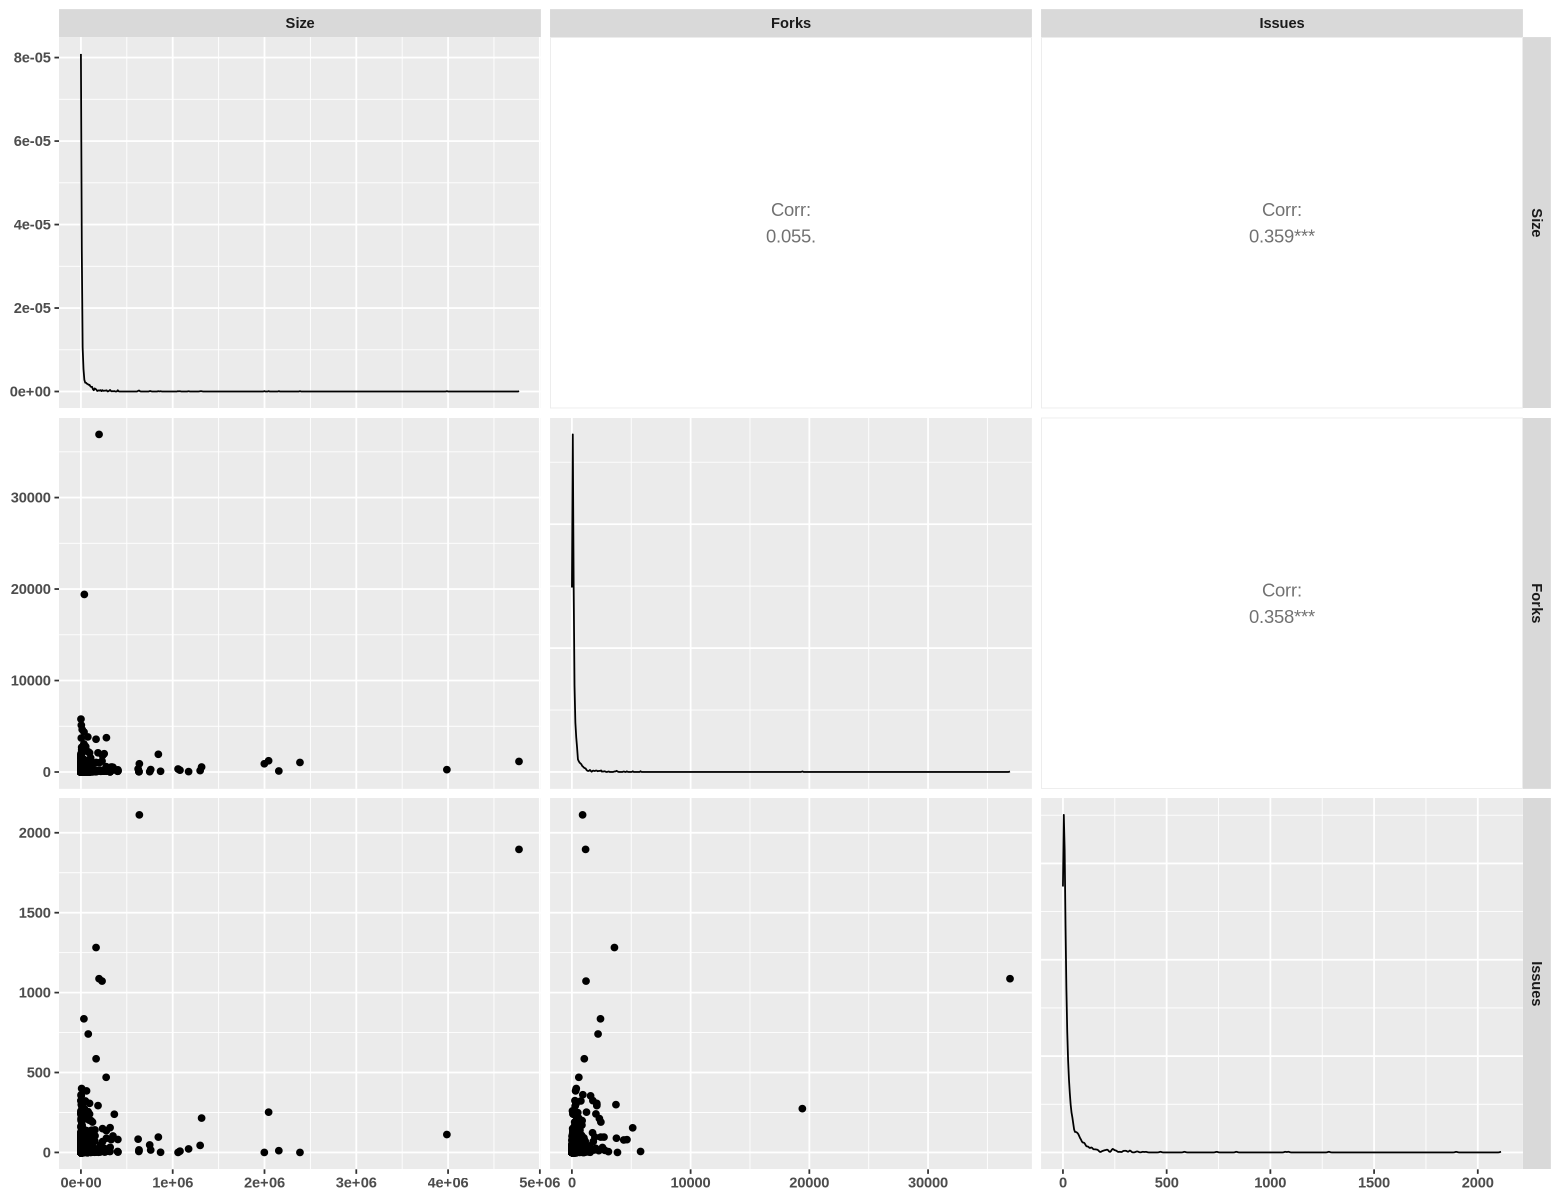

In [3]:
git_pair_plots <- tidy_git_data %>%
    select(-Stars, -Language, -has_Downloads, -has_Wiki) %>%
    ggpairs(progress = FALSE) +
    theme(
        text = element_text(face = "bold"),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )

cat("[Pairwise Plot 1] Pairwise Plot used to check for Multicollinearity")
git_pair_plots

Creating a pairwise plot to visually see if any pairs of input variables seem to be highly correlated; a quick check for multicollinearity.

**Interpretation**:
- There is a weak positive correlation between `Forks` and `Size` ($r = 0.055$)
- There is a weak to moderate positive correlation between `Issues` and `Size` ($r = 0.359$)
- There is a weak to moderate positive correlation between `Issues` and `Forks` ($r = 0.358$)

**Note**
Since our this research question mainly focuses on prediction, we do not need to worry about confounds as much.

### Creating a Multiple Linear Regression Model

In [4]:
git_MLR_add <- lm(Stars ~ Size + Forks + Issues + Language + has_Downloads + has_Wiki, data = tidy_git_data)

git_MLR_add_results <- tidy(git_MLR_add, conf.int = TRUE)

cat("[Table 2] Relevant Data Used to Write our Linear Regression Model")
git_MLR_add_results

tidy_git_data$pred_MLR_int <- predict(git_MLR_add)

[Table 2] Relevant Data Used to Write our Linear Regression Model

term              estimate      std.error    statistic  p.value      
1 (Intercept)        8.207832e+02 6.174997e+02  1.3292041  1.840350e-01
2 Size               2.261979e-04 2.499221e-04  0.9050737  3.656092e-01
3 Forks              1.970809e+00 4.665564e-02 42.2416123 4.161237e-239
4 Issues             2.132217e+00 5.530830e-01  3.8551477  1.218339e-04
5 LanguageJava      -7.646947e+02 2.134610e+02 -3.5823627  3.542277e-04
6 LanguagePython    -5.135186e+02 1.985795e+02 -2.5859592  9.828595e-03
7 has_DownloadsTRUE  5.813587e+02 5.929101e+02  0.9805174  3.270298e-01
8 has_WikiTRUE      -4.732683e+02 1.501769e+02 -3.1514052  1.665350e-03
  conf.low      conf.high    
1 -3.907242e+02  2.032291e+03
2 -2.641383e-04  7.165341e-04
3  1.879273e+00  2.062346e+00
4  1.047092e+00  3.217341e+00
5 -1.183496e+03 -3.458936e+02
6 -9.031229e+02 -1.239142e+02
7 -5.819050e+02  1.744622e+03
8 -7.679088e+02 -1.786278e+02

After creating the model with 95% confidence intervals, we can analyze the estimated intercepts, slopes, difference in intercepts, and difference in slopes from this dataframe and get the proposed linear regression equation for our additive model.

### Exploring the Variance Inflation Factor

In [5]:
vif_git_MLR_add <- vif(git_MLR_add)
cat("[Table 3] Variance Inflation Factor Table")
round(vif_git_MLR_add, 3)

[Table 3] Variance Inflation Factor Table

GVIF  Df GVIF^(1/(2*Df))
Size          1.162 1  1.078          
Forks         1.158 1  1.076          
Issues        1.326 1  1.151          
Language      1.014 2  1.003          
has_Downloads 1.023 1  1.011          
has_Wiki      1.028 1  1.014

We can use the Variance Inflation Factor to check for *Multicollinearity* within the input variables.  Since the VIF's of the input variables are $\approx$ 1 and are relatively low, we can conclude that there is no multicollinearity within this tidied dataset.

**Note**:
Since our this research question mainly focuses on prediction, we do not need to worry about confounds as much.

### Creating Correlation Matrix

In [6]:
corr_matrix_git <- tidy_git_data |>
    select(-Stars, -Language, -has_Downloads, -has_Wiki, -pred_MLR_int) |>
    cor() |>
    as.data.frame() |>
    rownames_to_column("var1") |>
    pivot_longer(-var1, names_to = "var2", values_to = "corr")

cat("[Table 4] Correlation Matrix Table")
corr_matrix_git

[Table 4] Correlation Matrix Table

var1   var2   corr      
1 Size   Size   1.00000000
2 Size   Forks  0.05500857
3 Size   Issues 0.35902754
4 Forks  Size   0.05500857
5 Forks  Forks  1.00000000
6 Forks  Issues 0.35772113
7 Issues Size   0.35902754
8 Issues Forks  0.35772113
9 Issues Issues 1.00000000

The dataframe created to measure the correlation between the relationships of our chosen numerical input variables, will soon be used to build our correlation matrix heatmap.

[Heatmap Matrix 1] Heatmap Matrix of Correlation of Numerical Input Variables

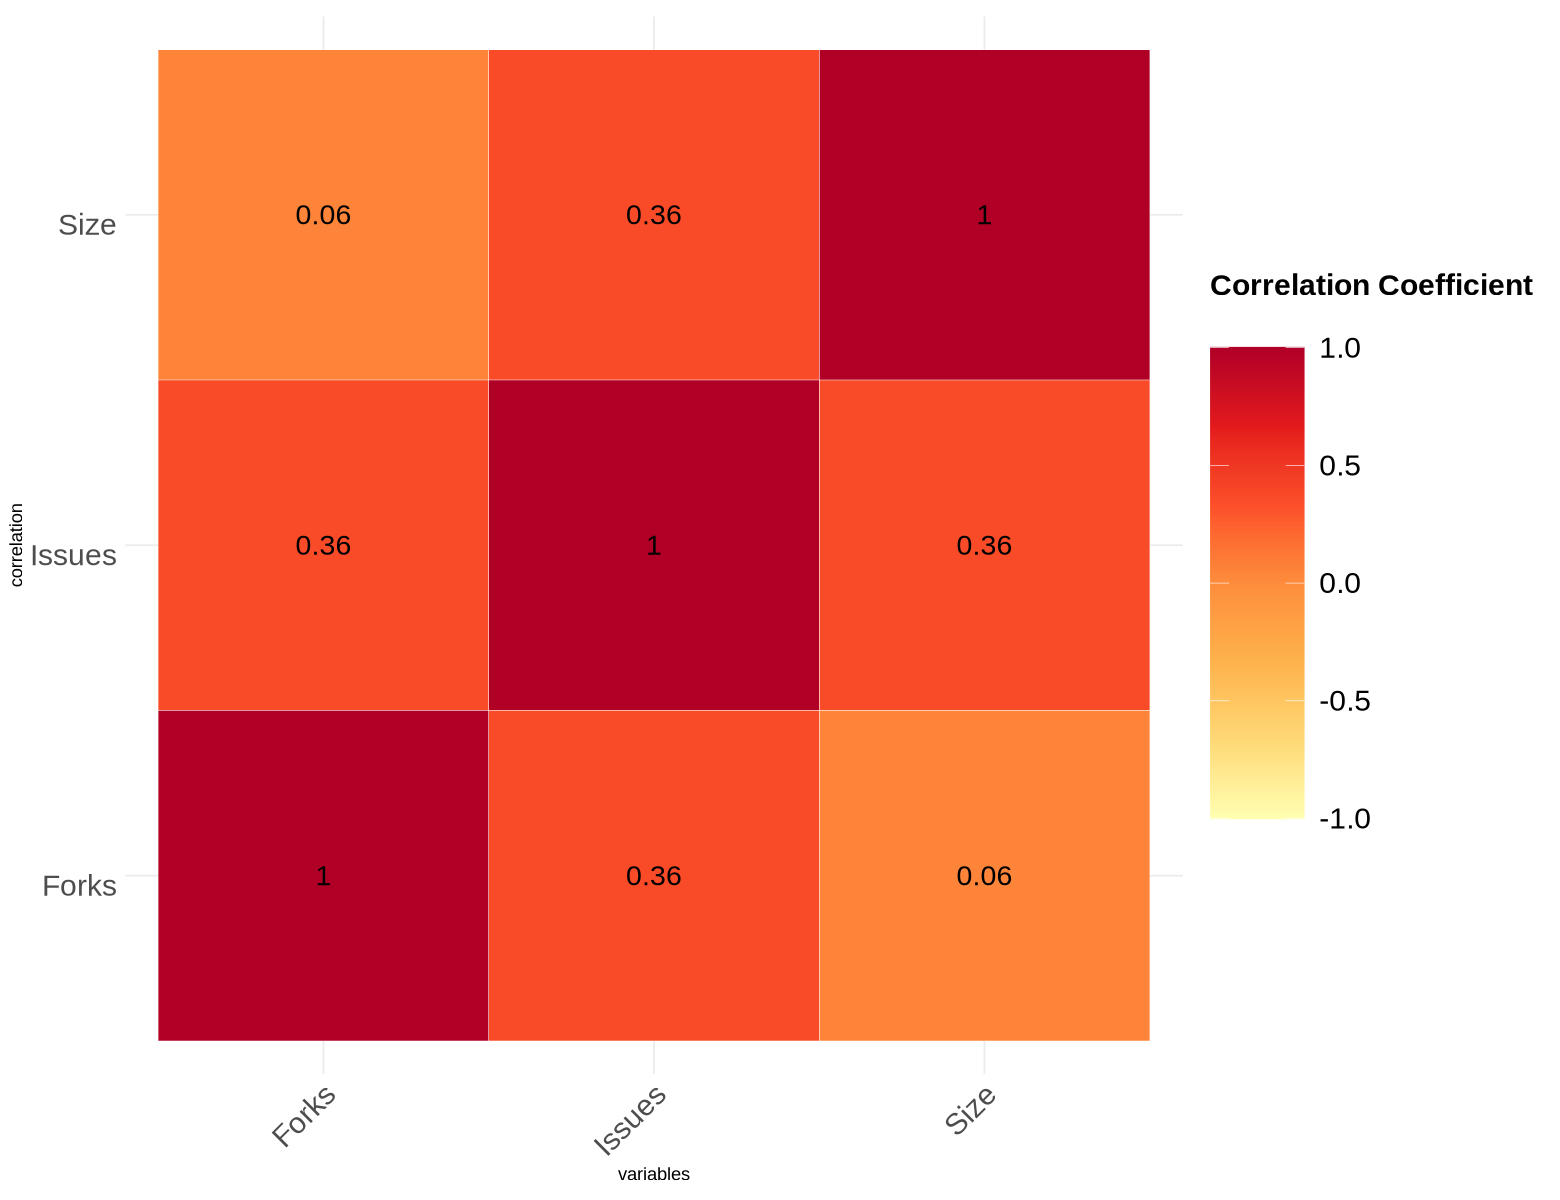

In [7]:
plot_corr_matrix_git <- corr_matrix_git |>
    ggplot(aes(x = var1, y = var2)) +
    geom_tile(aes(fill = corr), color = "white") +
    scale_fill_distiller("Correlation Coefficient \n",
                        palette = "YlOrRd",
                        direction = 1, limits = c(-1,1)
                        ) +
    labs(x = "variables", y = "correlation") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(
            angle = 45, vjust = 1,
            size = 18, hjust = 1
            ),
        axis.text.y = element_text(
            vjust = 1,
            size = 18, hjust = 1
            ),
        legend.title = element_text(size = 18, face = "bold"),
        legend.text = element_text(size = 18),
        legend.key.size = unit(2, "cm")
    ) +
    coord_fixed() +
    geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)

cat("[Heatmap Matrix 1] Heatmap Matrix of Correlation of Numerical Input Variables")
plot_corr_matrix_git

A correlation coefficient heatmap to give another visualization to multicollinearity (only accounts for numerical variables).

**Interpretation**:
- There is a weak positive correlation between `Forks` and `Size` ($r = 0.06$)
- There is a weak positive correlation between `Issues` and `Size` ($r = 0.36$)
- There is a weak to moderate positive correlation between `Issues` and `Forks` ($r = 0.36$)

**Note**
Since our this research question mainly focuses on prediction, we do not need to worry about confounds as much.

### Creating a Boxplot to Visualize Variation

Warning message:
“Removed 19 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 19 rows containing non-finite values (`stat_summary()`).”


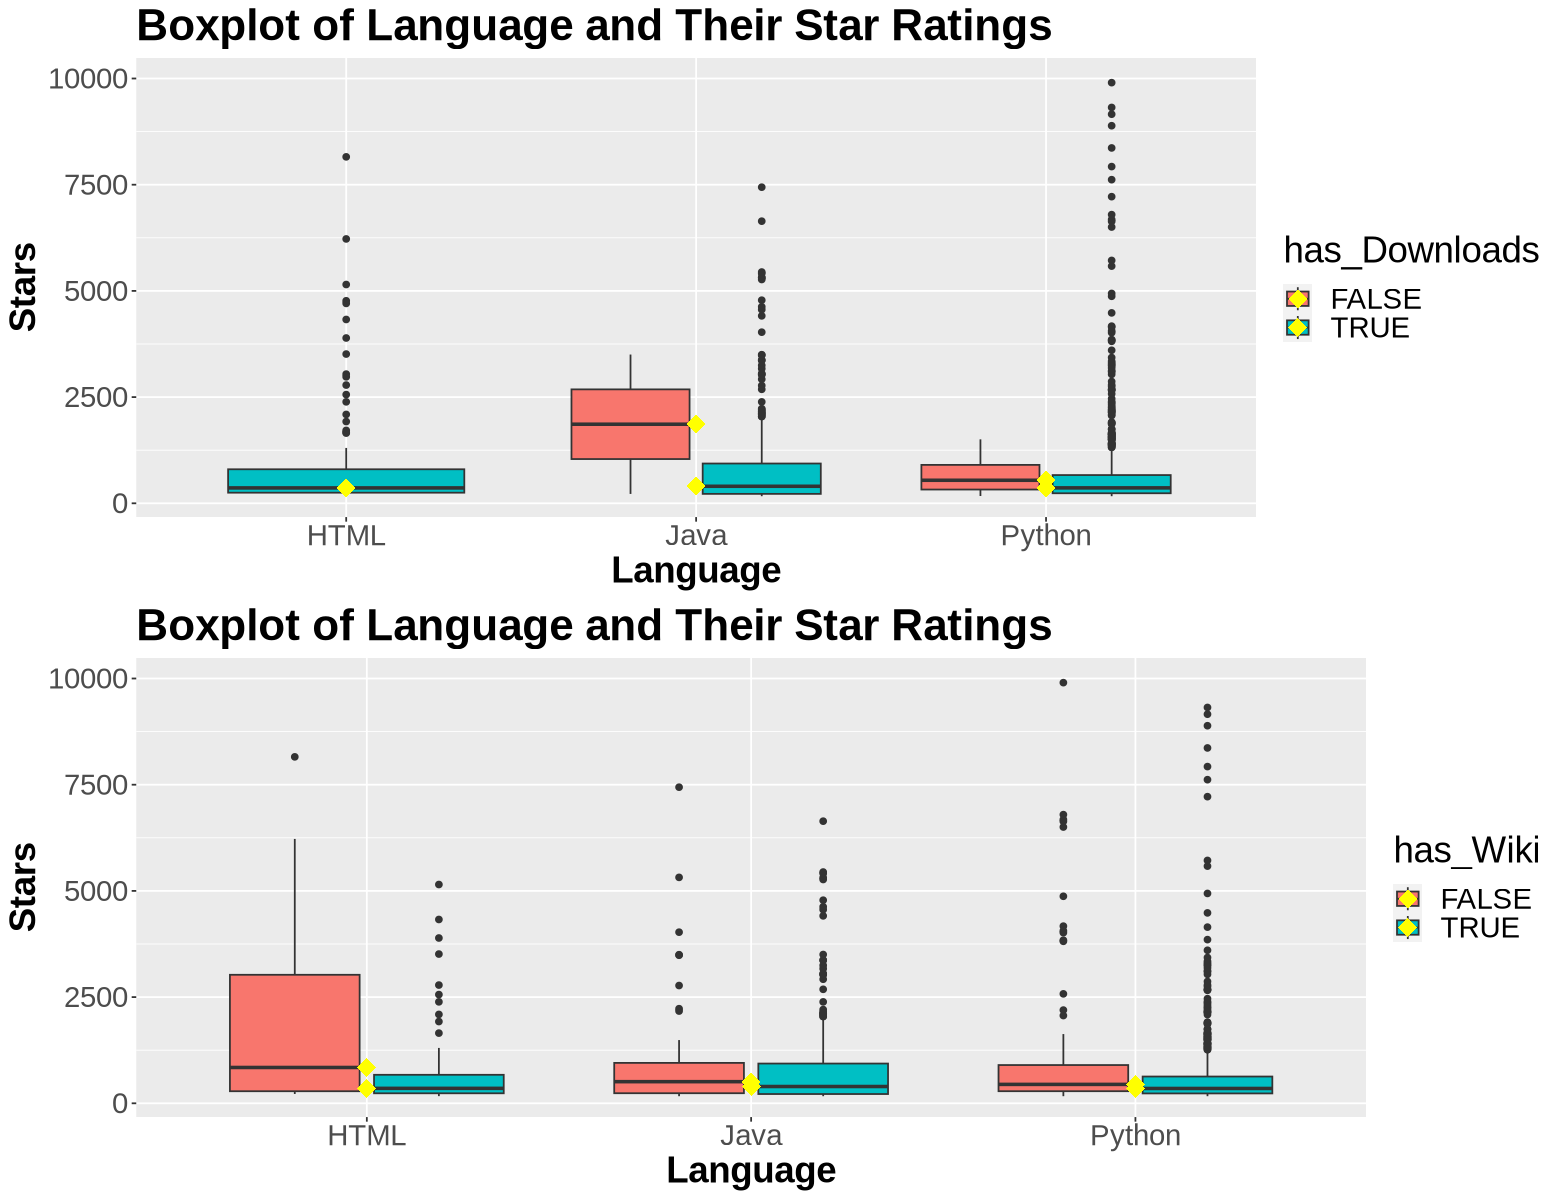

In [8]:
git_lang_boxplots <- tidy_git_data %>%
    ggplot() +
    geom_boxplot(aes(x = Language, y = Stars, fill = has_Downloads)) +
    theme(
        text = element_text(size = 22),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) +
    ggtitle("Boxplot of Language and Their Star Ratings") +
    xlab("Language") +
    ylab("Stars") +
    ylim(167, 10000) +
    stat_summary(aes(x = Language, y = Stars, fill = has_Downloads),
                 fun = median, colour = "yellow", geom = "point",
                 shape = 18, size = 5
                 )

git_archive_boxplots <- tidy_git_data %>%
    ggplot() +
    geom_boxplot(aes(x = Language, y = Stars, fill = has_Wiki)) +
    theme(
        text = element_text(size = 22),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) +
    ggtitle("Boxplot of Language and Their Star Ratings") +
    xlab("Language") +
    ylab("Stars") +
    ylim(167, 10000) +
    stat_summary(aes(x = Language, y = Stars, fill = has_Wiki),
                 fun = median, colour = "yellow", geom = "point",
                 shape = 18, size = 5
                 )


grid.arrange(git_lang_boxplots, git_archive_boxplots)

The first boxplot shows us the distributions of `Stars` to their respective programming `Language` considering their `has_Downloads` status.  As shown in the graph, we can see that there does not seem to be any obvious discrepancy in the variation between `Language` and `Stars` with their respective `has_Downloads` status.  An interesting thing to note is that there does not seem to be many data values for projects that do not have *downloadable files*, therefore `has_Downloads` being false might be a small proportion of the dataset.

The second boxplot shows us the distribution of `Stars` to their `has_Wiki` Status considering their programming `Language`.  Additionally, this boxplot does not show any obvious descripancy between the variation of the `has_Wiki` status and the amount of `Stars` a GitHub project recieves; however the variance of HTML projects is interesting to note, but it does not have any concerning discrepancies.

### Creating Side-By-Side Scatter Plots to Visualize the Relationship

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 386 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 412 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 78 rows containing missing values (`geom_smooth()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 67 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 106 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 371 rows containing non-finite values (`stat_smooth()`).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.06”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.06”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :

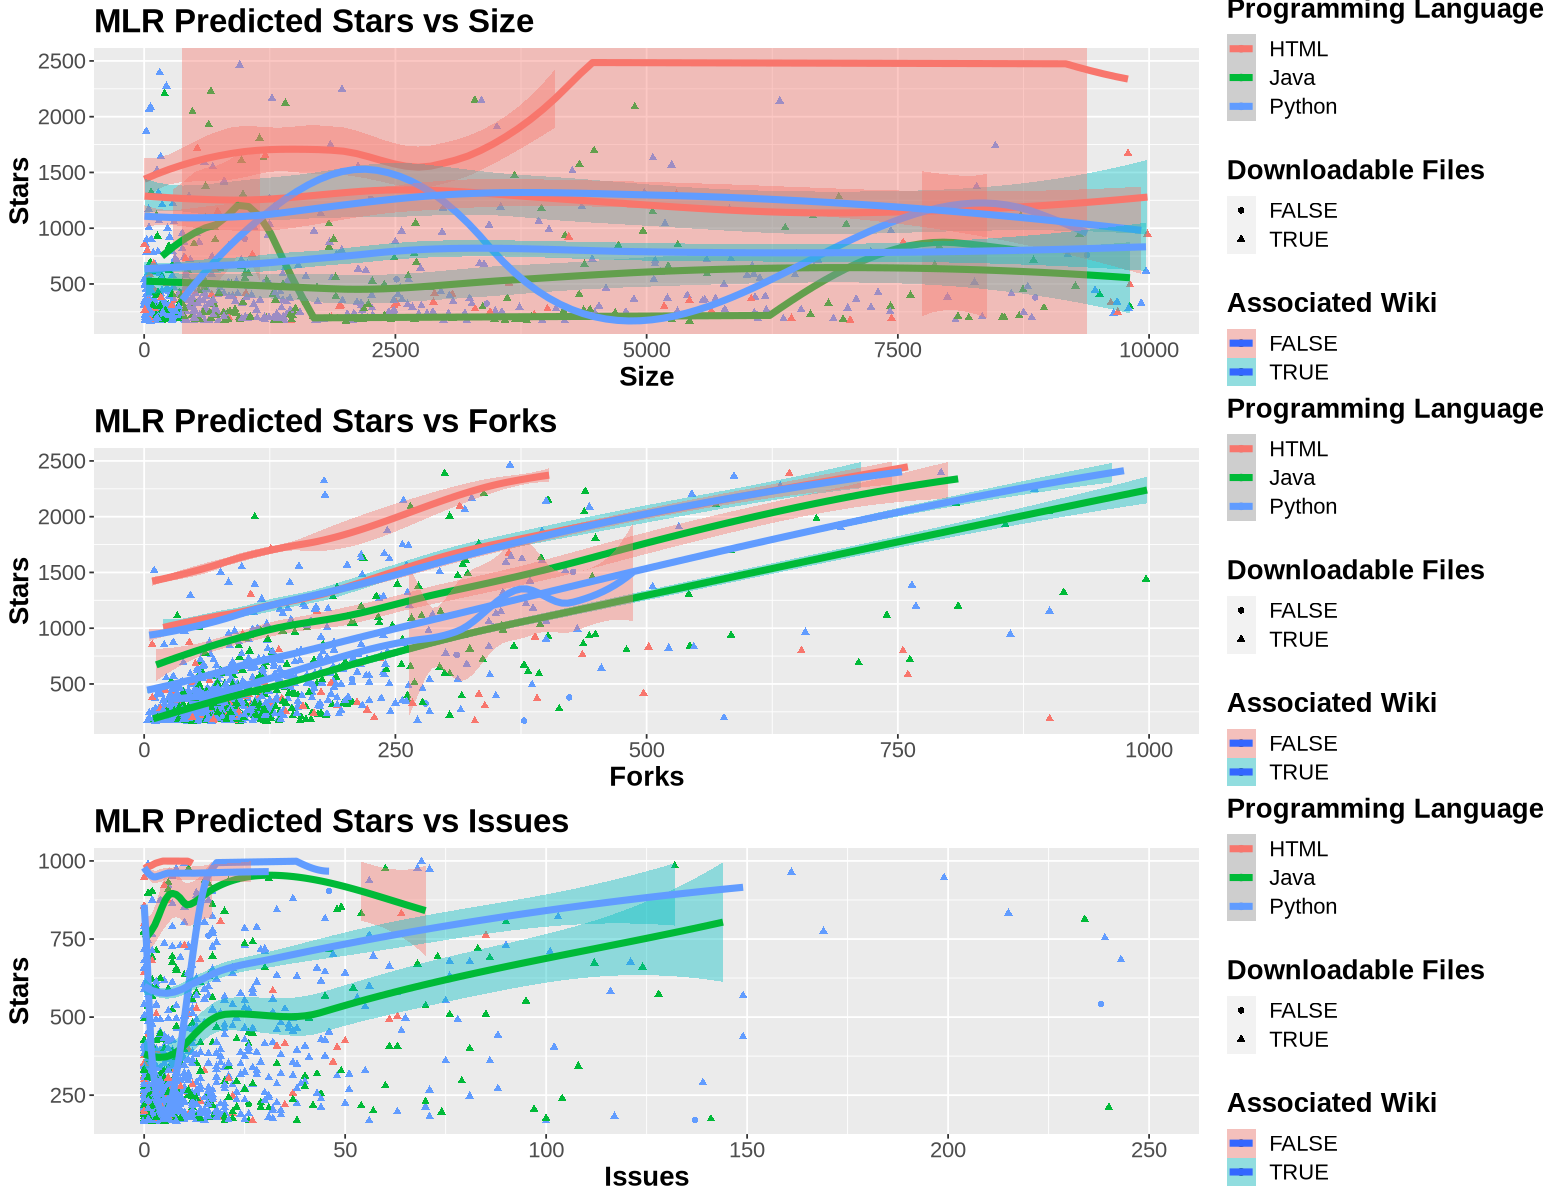

In [9]:
git_size_MLR_add_plot <- ggplot(tidy_git_data, aes(
    x = Size,
    y = Stars,
    color = Language,
    shape = has_Downloads,
    fill = has_Wiki
    )) +
    geom_point() +
    geom_smooth(aes(y = pred_MLR_int), linewidth = 2) +
    ylim(167, 2500) +
    xlim(0, 10000) +
    labs(
        title = "MLR Predicted Stars vs Size",
        x = "Size",
        y = "Stars",
        color = "Programming Language",
        shape = "Downloadable Files",
        fill = "Associated Wiki"
    ) +
    theme(
        text = element_text(size = 16.5),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
    )

git_forks_MLR_add_plot <- ggplot(tidy_git_data, aes(
    x = Forks,
    y = Stars,
    color = Language,
    shape = has_Downloads,
    fill = has_Wiki
    )) +
    geom_point() +
    geom_smooth(aes(y = pred_MLR_int), linewidth = 2) +
    ylim(167, 2500) +
    xlim(0, 1000) +
    labs(
        title = "MLR Predicted Stars vs Forks",
        x = "Forks",
        y = "Stars",
        color = "Programming Language",
        shape = "Downloadable Files",
        fill = "Associated Wiki"
    ) +
    theme(
        text = element_text(size = 16.5),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
    )

git_watchers_MLR_add_plot <- ggplot(tidy_git_data, aes(
    x = Issues,
    y = Stars,
    color = Language,
    shape = has_Downloads,
    fill = has_Wiki
    )) +
    geom_point() +
    geom_smooth(aes(y = pred_MLR_int), linewidth = 2) +
    ylim(167, 1000) +
    xlim(0, 250) +
    labs(
        title = "MLR Predicted Stars vs Issues",
        x = "Issues",
        y = "Stars",
        color = "Programming Language",
        shape = "Downloadable Files",
        fill = "Associated Wiki"
    ) +
    theme(
        text = element_text(size = 16.5),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
    ) 

grid.arrange(git_size_MLR_add_plot, git_forks_MLR_add_plot, git_watchers_MLR_add_plot)

The plot of 3 different scatter plots.  Each showing the linear regression model for the Explanatory Variable `Stars` vs different numerical input variables `Size`, `Forks`, and `Watchers` with their respective Programming Language.  We can use these plots to get a visualization of the correlation between each variable to see if they show a rough positive/negative correlation.  Each of these graphs have 6 different linear regression lines, their colour representing their programming language used and shapes representing archived status.

**MLR Predicted Stars vs Size**
- From quick glance, there seems to be a weak positive linear relationship between `Stars` and `Size`

**MLR Predicted Stars vs Forks**
- Looking at the graph generated, there seems to exists a strong positive linear relationship between `Stars` and `Forks`

**MLR Predicted Stars vs Issues**
- From a quick glance at the graph, there seems to exist a weak-moderate positive linear relationship between `Stars` and `Issues`
- Interesting thing to note is that some of the regression lines stop before `Issues` < 100.

**Note**
Many Regression Lines plotted on the scatterplots seem to be end earlier

# Methods and Plan <a id = 'a3'>

## Why is This Method Appropriate?

Linear Regression can be used as a form of predictive modeling, where the model is built to train and predict new observations.  For linear regression models, there is a line-of-best-fit you can insert into the dataset to form a linear regression equation; where different input variables can drastically change the model.  We can begin by constructing a full additive model of our tided dataset.

From there, we will be using the *Lasso Ridge Regression Model* to find the hopefully find best reduced model applicable for prediction.  We will first find the **Root Mean Square Error (RMSE)** of the additive model and then compare the **RMSE** to our newly created model found by the *Lasso Ridge Regression Model* to see if the reduced model is any better than the full additive model.

Lasso Ridge Regression is a form of model selection that is used in predictive modelling.  It applies certain penalizations to variable coefficients that are considered "less important" and the weights are shifted towards input variables that appear to have a better correlation with the explanatory variable.

Since we are using the *Lasso Ridge Regression Model*, we will be using a 70/30 training/testing split to assess the predictive performance of our prediction model.  Additionally, we will have to mutate our Categorical Variables for the model to be applicable to our Random Sample.  

We have split our data accordingly in [Splitting Data](#split) section and gave a brief explanation to how we mutated the data and how we will interpret those results

The **Root Mean Square Error** measures the average distance from the datapoint points to line-of-best-fit of the model, where a lower value of RMSE means that the line-of-best-fit fitted better into our sample and a higher value of RMSE means that the average value of distance of points and line-of-best-fit were much larger making our model more inaccurate.  We can use Lasso Ridge Regression to figure out this value.

After going through this method, we will hopefully have a discovered a model which minimizes the **RMSE** from our list of selected input variables.

## Which Assumptions are Required, if any, to Apply the Method Selected? <a id = 'limit'>

Assumptions needed for a *Linear Regression* Model:
- Linearity
- Homoscedasticity
- Independence of Errors
- Normality
- Independence of Independent Variables

## What Are Potential Limitations or Weaknesses of the Method Selected?

Some of the potential limitations or weaknesses of the LASSO Regresion Model include:
- **Outliers**
    - Outliers in our dataset can drastically affect our regresion model
- **Categorical Variables within Lasso Ridge Regression**
    - Categorical Variable in the Lasso Ridge Regression Model seem to be very sensitive in prediction, especially if there are multiple levels in the categorical variable, even though we will be mutating the data to make our categorical variables numerical, the Lasso Ridge Regression algorithm is not designed to fit categorical variables.
- **Testing/Training Split**
    - Since we have split our data into a 70/30 testing/training split, the results is heavily dependent on our testing and training data; therefore our end results could be biased if we have a biased data.
    
- **Biased estimators**
    - We can take care of this by fitting regular least squares on the variables selected by Lasso. This approach is called **post-lasso**.

- **Post-inference** 
    - Fitting a LS regression after LASSO, we are using the data to select the variables as well as to conduct inference. We cannot rely on the inference given by the `lm`, unless we split the data to take care of this problem.

# Implementation of a Proposed Model <a id = 'model'>

Continuing on from *Assignment 3*, since we are planning to use the Lasso Ridge Penalty Regression, we will try to incorperate as much information as we can into our original full additive model and see we can maniplate the biases in our dataset to apply penalities to our full additive model.  We will then take a random sample of $n = 1200$ of GitHub projects with the languages *HTML, Java, Python*, reselect the variables to create new *tidy dataset*.

In [10]:
new_tidy_git_data <- git_data |>
    select(Size, Stars, Forks, Issues, Language, has_Issues, has_Projects, has_Downloads, has_Wiki, has_Pages,
           has_Discussion, is_Fork, is_Archived, has_Projects, is_Template) |>
    filter(Language == "HTML" | Language == "Java" | Language == "Python") |>
    drop_na() |>
    sample_n(size = 1200, replace = FALSE)

## Splitting Data <a id = 'split'>

In [11]:
set.seed(123)
#Mutating Language to 0 and 1
training_git_data <- new_tidy_git_data %>%
    mutate(Language = ifelse(Language == "Java", 1, ifelse(Language == "Python", 2, 0))) |>
    mutate(is_Downloads = ifelse(has_Downloads == "TRUE", 1, 0)) |>
    mutate(is_Wiki = ifelse(has_Wiki == "TRUE", 1, 0)) |>
    mutate(is_Issues = ifelse(has_Issues == "TRUE", 1, 0)) |>
    mutate(is_Projects = ifelse(has_Projects == "TRUE", 1, 0)) |>
    mutate(is_Pages = ifelse(has_Pages == "TRUE", 1, 0)) |>
    mutate(is_Discussions = ifelse(has_Discussion == "TRUE", 1, 0)) |>
    mutate(has_Fork = ifelse(is_Fork == "TRUE", 1, 0)) |>
    mutate(has_Archived = ifelse(is_Archived == "TRUE", 1, 0)) |>
    mutate(has_Template = ifelse(is_Template == "TRUE", 1, 0)) |>
    select(-has_Downloads, -has_Wiki, -has_Issues, -has_Projects, -has_Wiki, -has_Pages, -is_Fork, -has_Discussion, -is_Archived, -is_Template)

cat("[Table 5] head of tided mutated data")
head(training_git_data)
#Testing Training Data 70/30 Split
training_git  = training_git_data %>%
  sample_frac(0.7)

testing_git = training_git_data %>%
  setdiff(training_git)


#Building Matrices
git_X_train <- model.matrix(object = Stars ~ .,
  data = training_git)[, -1]

git_Y_train <- as.matrix(training_git[, "Stars"])


git_X_test <- model.matrix(object = Stars ~ .,
  data = testing_git)[, -1]

git_Y_test <- as.matrix(testing_git[, "Stars"])

[Table 5] head of tided mutated data

Size   Stars Forks Issues Language is_Downloads is_Wiki is_Issues is_Projects
1  45588  186   50     2    0        1            1       1         1          
2    391  414   64     8    2        1            0       1         0          
3 161584 1632  131   269    2        1            1       1         0          
4   1840 1099  298    22    2        1            0       1         0          
5     94  600  213     0    2        1            1       1         1          
6    204  209   97    15    0        1            0       1         0          
  is_Pages is_Discussions has_Fork has_Archived has_Template
1 1        0              0        0            0           
2 0        0              0        1            0           
3 1        0              0        0            0           
4 0        1              0        0            0           
5 0        0              0        0            0           
6 1        0              0        0            0

Creating a 70/30 split from the random sample generated.  With the split, we have $n_{training} = 840$ and $n_{test} = 360$ where will be using the training data to make predictions on the testing data to find the overall accuracy between the additive model and reduced model.

**Training/Test Data**
- The Languages of the dataset have been converted to numerical values where the values are: 0 = `HTML`, 1 = `Java`, 2 = `Python`.  We mutate these values so the Lasso Ridge Regression model has a better way of applying penalities to those input variables.  Similar thing has been done for the categories `has_Downloads`, `has_Wiki`, `has_Issues`, `has_Projects`, `has_Discussions`, `is_Fork`, `is_Archived`,  and `is_Template`.  Where 0 = *FALSE* and 1 = *TRUE*.
- This gives us a total of 11 numerical input variables to make predictions on our explanatory variable `Stars` using Lasso's Regresion Model.  We will then find the value of $\lambda$ which minimizes the **Mean Square Error** of the prediction line.  We will then take the **Root Mean Square Error** to make comparisons about the full and reduced models. 

## Selecting the value of $\lambda$ which minimizes $MSE_{test}$

In [12]:
set.seed(123)
git_cv_lambda_ridge <- cv.glmnet(
    x = git_X_train, y = git_Y_train,
    alpha = 0,
    lambda = exp(seq(-5, 10, 0.1))
)

git_cv_lambda_ridge


Call:  cv.glmnet(x = git_X_train, y = git_Y_train, lambda = exp(seq(-5,      10, 0.1)), alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index  Measure       SE Nonzero
min      0   151 11223880  5493822      11
1se   2208    24 16636661 11247421      11

## Visualization of the estimated test MSE at each value of lambda in the sequence

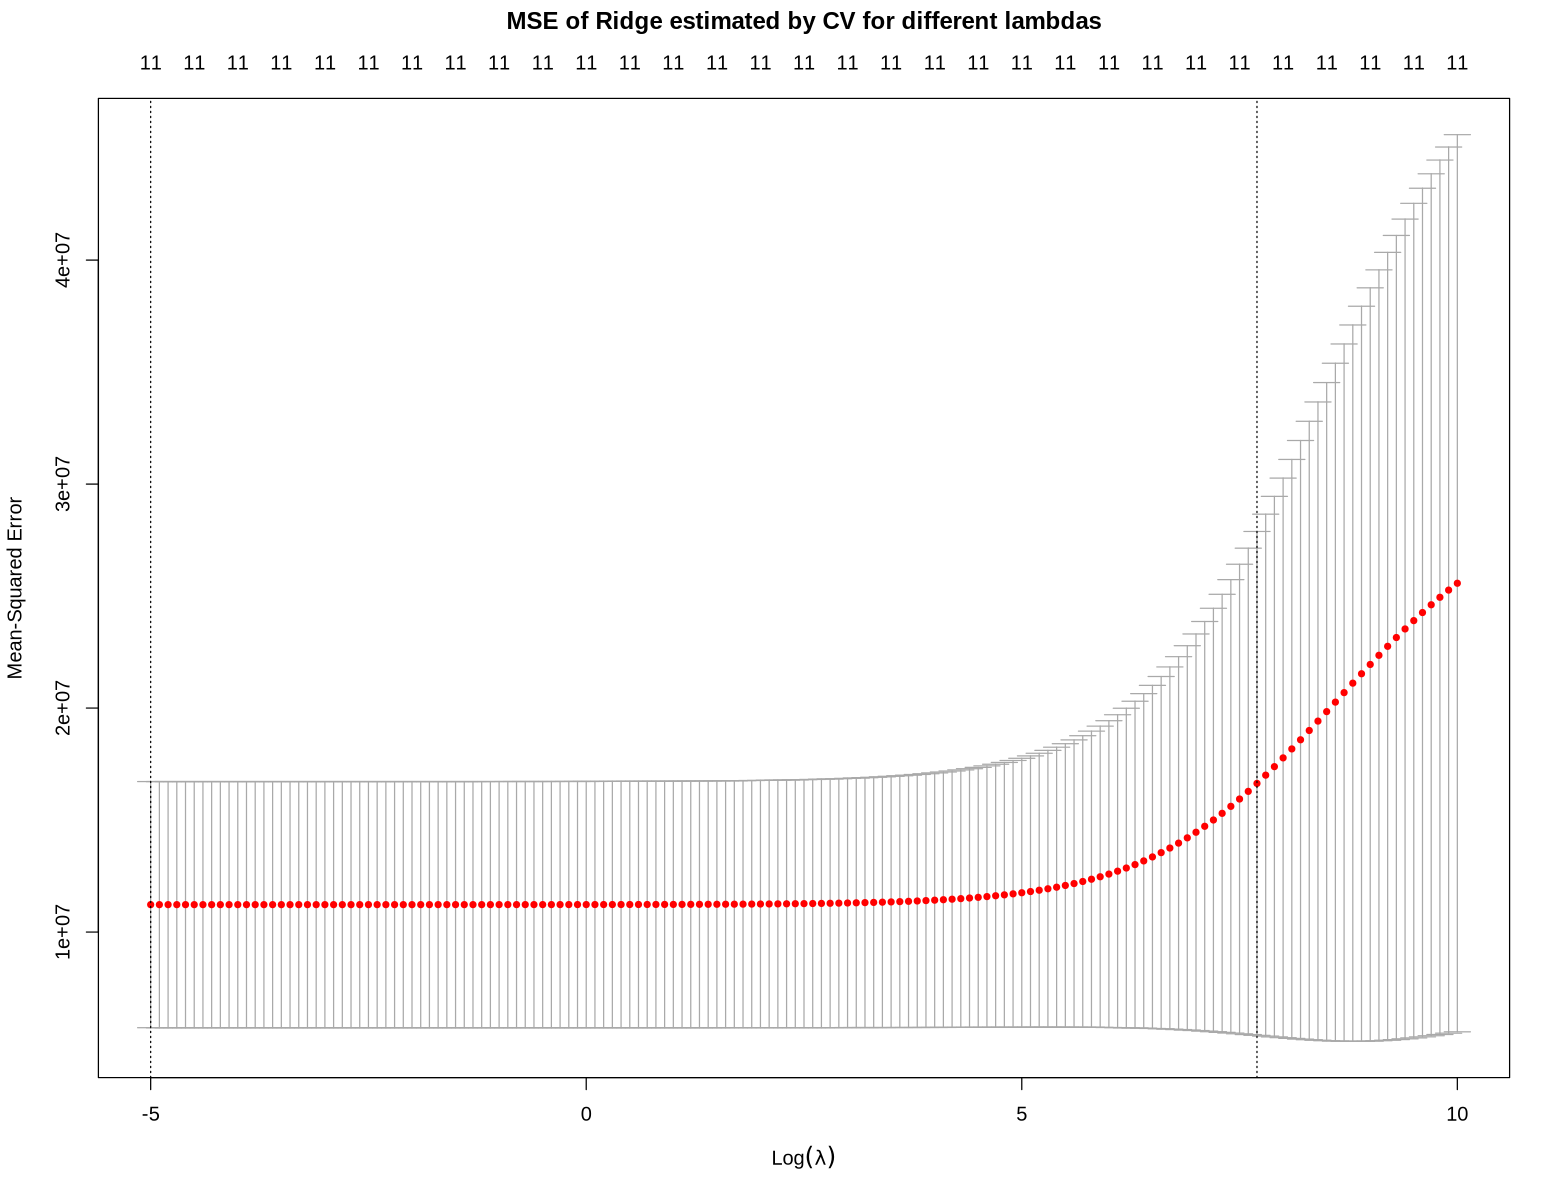

In [13]:
plot_data <- git_cv_lambda_ridge
plot(plot_data, main = "MSE of Ridge estimated by CV for different lambdas\n\n")

The resulting plot showcases the Mean Square Error with on the y-axis along with the range of $\lambda$ on the x-axis.  This displays the variation of *MSE* for different variations of $\lambda$.  We can the lowest point in the graph to get our minimum value of $\lambda$ for our Ridge Regression application.

In [14]:
git_lambda_min_MSE_ridge <- round(git_cv_lambda_ridge$lambda.min, 4)
git_lambda_min_MSE_ridge

[1] 0.0067

## Penalization of Ridge Regression Application

In [15]:
git_ridge_min_coef <- coef(git_cv_lambda_ridge, s = "lambda.min")
git_ridge_min_coef

14 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)    -9.512008e+02
Size            2.015017e-04
Forks           2.559411e+00
Issues          2.552088e+00
Language        2.774363e+02
is_Downloads   -5.906781e+01
is_Wiki        -4.481387e+02
is_Issues       1.207643e+03
is_Projects    -8.728141e+01
is_Pages        6.814734e+01
is_Discussions  6.868011e+02
has_Fork        .           
has_Archived   -1.387496e+02
has_Template    .           

Applications of the penalities appled to our input variables.

**Note**
The columns `has_Fork` and `has_Template` contains values filled with all *0's*, therefore these values do not contribute our Lasso Ridge Regression Model.

## Comparison of Ridge Regression Between Full Model and Ridge Model

In [21]:
git_full_OLS <- lm(Stars~. ,data = training_git)

git_reg_coef <- round(
    cbind(
        Full_OLS = coef(git_full_OLS),
        Ridge_min = as.vector(git_ridge_min_coef))
    , 4) %>% as.data.frame()

Comparison of *Estimated Regression Coefficient* of Full Model to that of the Regression Ridge Model

## Out Of Sample Prediction

In [22]:
git_test_pred_full_OLS <- predict(git_full_OLS, newdata = testing_git)

head(git_test_pred_full_OLS)

Warning message in predict.lm(git_full_OLS, newdata = testing_git):
“prediction from a rank-deficient fit may be misleading”


1         2         3         4         5         6 
-127.6384 1426.6048 2258.2710  356.1086  481.6831  371.4060

Obtaining out-of-sample prediction values of number of `Stars` from the values in the testing set `testing_git`

## RMSE of Full Regression Model

In [23]:
git_R_MSE_models <- tibble(
    Model = "OLS Full Regression",
    R_MSE = rmse(
        preds = git_test_pred_full_OLS,
        actuals = testing_git$Stars
        )
    )

cat("[Table 7] RMSE of Full Model")
git_R_MSE_models

[Table 7] RMSE of Full Model

Model               R_MSE   
1 OLS Full Regression 1653.179

We have the $RMSE_{full}$ to be $RMSE_{full} \approx 1653.179$

##  Prediction with Penalization Applied to Testing Set

In [24]:
git_test_pred_ridge_min <- predict(git_cv_lambda_ridge,
                                   newx = git_X_test,
                                   s = "lambda.min")

Making predictions on the testing set with the training model and its minimum value of $\lambda$.

## Comparison of Full Model to Ridge Regression Model <a id = 'result'>

In [25]:
git_R_MSE_models <- rbind(
    git_R_MSE_models,
    tibble(
        Model = "Ridge Regession with minimum MSE",
        R_MSE = rmse(
            preds = git_test_pred_ridge_min,
            actuals = git_Y_test
        )
    )
)

cat("[Table 9] Comparison of RMSE Full Model to Ridge Regression Model")
git_R_MSE_models

[Table 9] Comparison of RMSE Full Model to Ridge Regression Model

Model                            R_MSE   
1 OLS Full Regression              1653.179
2 Ridge Regession with minimum MSE 1653.180

After utilizing the Lasso Ridge Regression Model and comparing that model to OLS Full Regression Model, we can see that the Lasso Ridge Regression Model performs **slighty worse** than the OLS Full Regression Model.  There can be many reasons to why this happens.

**Possible Issues with Model Created**
- The Full Additive Model might be the best model we can create
    - Although this is not often the case, a reduced model can perform worse than a full model if every input variable is necessary to create an accurate model.
- Bias Testing and Training data
    - Since this dataset contains multiple outliers (known from constructing a boxplot of the dataset), there is an increased chance that our testing/training data can also contain high bias and a large number of variance.  Sacrificing bias for a lowering variance will not work if the split dataset.  Additionally, splitting the data also has a chance to give us bias estimators which affects the ridge regression model
- Lasso Ridge Regression isn't that helpful in the first place
    - We use ridge regression to find a middle-ground between bias and variance in our model, however, if bias is already very large in our dataset and the variance in the dataset is genreally low, there is going to be little to no effect in using the ridge regression to as sacrificing bias for to lower variance for something that is already low will overfit our data.
    
**Note** $\newline$
Since the value of **RMSE** for both models is arbitarily close to one another, this can raise the discussion of whether the Lasso Ridge Regression Model has any significant effect on our model in the first place.

## Conclusion of Ridge Regression Model <a id = 'conc'>

The Lasso Ridge Regression Model does not create a model better than that of the full Model.  There appears to be high bias and low variation within the prediction model; that is, if we were to apply the Lasso Ridge Regression, the penalities applied to shrink the selected coefficients effects would not assist in creating a better model.

We could also use other model prediction methods.  Methods such as the *forward selection* algorithm, or *backward selection* could be attempted to see if there exists a 'better' model than the full additive model, if proper manipulation of data has been done.

Additionally, we do have the consider the possibility of biased training/testing set.  Since our conclusion is heavily dependent on our training/testing data, there is a slight off chance that our data used for evauluated is heavily biased, even if our sample size is relatively large $n = 1200$.